# 一、背景

> 电信服务是生活中常见的消费服务，在现代社会，凡是使用手机打电话，或者在家看电视，都必须通过电信运营商提供的通话、网络等服务才能实现。但如今高居不下的获客成本让电信运营商遭遇“天花板”，甚至陷入获客难的窘境。关于用户留存有这样一个观点，如果将用户流失率降低5%，公司利润将提升25%-85%。所以随着市场饱和度上升，电信运营商亟待解决增加用户黏性，延长用户生命周期的问题。正因为如此，电信用户流失分析与预测至关重要。

> 本文采用来自kaggle平台的电信客户数据集，来分析人们对电信服务的使用情况，以及帮助电信运营商找出客户流失的原因，并建立流失预测模型，从而降低客户流失率。(数据集链接如下: https://www.kaggle.com/blastchar/telco-customer-churn )

## 分析工具
> 本项目主要使用pandas, matplotlib, seaborn, sklearn等Python数据分析库，并在Jupyter Notebook环境下运行。

# 二、明确目标

## 业务流程

> ![](https://res.pandateacher.com/%E7%94%B5%E4%BF%A1%E4%B8%9A%E5%8A%A1%E6%B5%81%E7%A8%8B%E5%9B%BE.png)

## 理解字段

> 根据kaggle上的数据集介绍，该数据集共有21个字段，7043条记录。每条记录表示一个客户。

>
<figure>
    <table>
        <thead>
            <tr>
                <th style='text-align:center;'>序号</th>
                <th style='text-align:center;'>字段名</th>
                <th style='text-align:center;'>数据类型</th>
                <th style='text-align:center;'>字段描述</th>
                <th style='text-align:center;'>字段分类</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td style='text-align:center;'>1</td>
                <td style='text-align:center;'>顾客ID</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>客户ID</td>
                <td style='text-align:center;' rowspan="6">基本信息</td>
            </tr>
            <tr>
                <td style='text-align:center;'>2</td>
                <td style='text-align:center;'>性别</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>性别 (男, 女)</td>
            </tr>
            <tr>
                <td style='text-align:center;'>3</td>
                <td style='text-align:center;'>老年人</td>
                <td style='text-align:center;'>Integer</td>
                <td style='text-align:center;'>是否老年人 (是, 否)</td>
            </tr>
            <tr>
                <td style='text-align:center;'>4</td>
                <td style='text-align:center;'>伙伴</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>有无合作伙伴 (有, 无)</td>
            </tr>
            <tr>
                <td style='text-align:center;'>5</td>
                <td style='text-align:center;'>家属</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>有无家属 (有, 无)</td>
            </tr>
            <tr>
                <td style='text-align:center;'>6</td>
                <td style='text-align:center;'>在网时长</td>
                <td style='text-align:center;'>Integer</td>
                <td style='text-align:center;'>客户在网时长（月）</td>
            </tr>
            <tr>
                <td style='text-align:center;'>7</td>
                <td style='text-align:center;'>电话服务</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>是否开通电话服务 (是, 否)</td>
                <td style='text-align:center;' rowspan="9">服务信息</td>
            </tr>
            <tr>
                <td style='text-align:center;'>8</td>
                <td style='text-align:center;'>多线服务</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>是否开通多线服务 (是, 否, 无电话服务)</td>
            </tr>
            <tr>
                <td style='text-align:center;'>9</td>
                <td style='text-align:center;'>网络服务</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>是否开通网络服务 (DSL, 光纤, 否)</td>
            </tr>
            <tr>
                <td style='text-align:center;'>10</td>
                <td style='text-align:center;'>网络安全服务</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>是否开通网络安全服务 (是, 否, 无网络服务)</td>
            </tr>
            <tr>
                <td style='text-align:center;'>11</td>
                <td style='text-align:center;'>在线备份服务</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>是否开通在线备份服务 (是, 否, 无网络服务)</td>
            </tr>
            <tr>
                <td style='text-align:center;'>12</td>
                <td style='text-align:center;'>设备保护服务</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>是否开通设备保护服务 (是, 否, 无网络服务)</td>
            </tr>
            <tr>
                <td style='text-align:center;'>13</td>
                <td style='text-align:center;'>技术支持服务</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>是否开通技术支持服务 (是, 否, 无网络服务)</td>
            </tr>
            <tr>
                <td style='text-align:center;'>14</td>
                <td style='text-align:center;'>流媒体电视服务</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>是否开通流媒体电视 (是, 否, 无网络服务)</td>
            </tr>
            <tr>
                <td style='text-align:center;'>15</td>
                <td style='text-align:center;'>流媒体电影服务</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>是否开通流媒体电影 (是, 否, 无网络服务)</td>
            </tr>
            <tr>
                <td style='text-align:center;'>16</td>
                <td style='text-align:center;'>合同类型</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>合同期限 (月付, 一年, 两年)</td>
                <td style='text-align:center;' rowspan="5">付费信息</td>
            </tr>
            <tr>
                <td style='text-align:center;'>17</td>
                <td style='text-align:center;'>纸质化账单</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>有无纸质化账单 (是, 否)</td>
            </tr>
            <tr>
                <td style='text-align:center;'>18</td>
                <td style='text-align:center;'>支付方式</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>支付方式 (电子支票, 邮寄支票, 银行转帐, 信用卡</td>
            </tr>
            <tr>
                <td style='text-align:center;'>19</td>
                <td style='text-align:center;'>月消费金额</td>
                <td style='text-align:center;'>Float</td>
                <td style='text-align:center;'>月消费金额</td>
            </tr>
            <tr>
                <td style='text-align:center;'>20</td>
                <td style='text-align:center;'>总消费金额</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>总消费金额</td>
            </tr>
            <tr>
                <td style='text-align:center;'>21</td>
                <td style='text-align:center;'>流失</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>是否流失 (是, 否)</td>
                <td style='text-align:center;'>流失标签</td>
            </tr>
        </tbody>
    </table>
</figure>


> 通过理解字段，将字段分为4类，包括客户的**基本信息、开通的服务信息、付费信息以及流失标签**。基本信息包括性别、年龄（以是否老年人来区分）、是否有合伙伙伴（可以理解为工作伙伴或者朋友之类的）以及家属，在网时长。观察服务信息，可以分为两类基本服务：电话+网络服务，这两类基本服务又有各自的增值服务，如：多线电话、网络安全、在线备份等。此外还有支付方式、消费金额等付费信息。

> 虽然字段不多，但我们可以将这些字段提炼成一个业务流程，或者说一个“故事”，并依据业务流程提出问题，这是数据分析中基础而又核心的思维。

## 分析目的

> 1. 分析用户特征与流失是否存在关系
> 2. 从整体情况看，流失用户普遍具有的特征情况
> 3. 尝试找到合适的模型来预测流失用户
> 4. 针对性给出增加用户黏性、预防流失的建议

## 分析思路

> 通常数据分析包含了两种背景情况
> 1. 在先有业务需求的情况下，根据具体的业务整理出所需要的指标，进而去收集相关的数据进行分析。(**有具体业务知识支撑**）
> 2. 在已给定的有限的数据集的情况下，结合业务拆分出不同的指标，进而进行综合分析。（**无具体业务知识支撑**）

> 在第一种背景情况下，分析思路可以有以下几种:
>  - **角色扮演**：即尝试代入他的角色在自己身上，以获得不同的视角，从而站在他人的视角上来寻找有哪些需要进行数据分析的点。用这种方式能够找到的数据分析思路往往是对方最需要的，自然也就具有更高的价值。比如，可以把自己代入成公司的销售、投资人、运营、财务、客户、供应商等，站在这些视角寻找有哪些有帮助的分析思路。
>  - **战略分析**：即从公司的战略目标的角度进行分析。每一项业务本质上是公司整体战略的支撑，换句话说，一项业务如何发展是由公司整体战略决定的。这种方法以全局视角进行分析，得到的结果也是比较有价值的。

> 在第二种背景情况下，分析思路可以有以下几种:
>  - **业务指标**：即对各个业务指标进行逐个拆解分析，分析当前状况的成因是由于哪些指标所导致的。
>  - **假设验证**：即根据数据所展示的客观事实而进行对当前状况成因的若干假设，进而分别对这些假设进行验证，这样可以探索性的得到不同的发现。

> 本案例来源自网络采集，在进行分析之前先得到了数据集，但缺少业务背景，即上文的第二种背景情况。本案例采用**业务指标**和**假设验证**两种分析思路。

# 三、数据清洗与处理

## 导入数据

In [51]:
import pandas as pd
import warnings 

# 取消警告提示
warnings.filterwarnings('ignore')

# 读取并查看数据
df = pd.read_csv('./static/电信运营商用户数据.csv', encoding='gbk')
df.head()

,顾客ID,性别,老年人,伙伴,家属,在网时长,电话服务,多线服务,网络服务,网络安全服务,...,设备保护服务,技术支持服务,流媒体电视服务,流媒体电影服务,合同类型,纸质化账单,支付方式,月消费金额,总消费金额,流失
0,7590-VHVEG,女,否,有,无,1,否,无电话服务,DSL,否,...,否,否,否,否,月付,是,电子支票,29.85,29.85,否
1,5575-GNVDE,男,否,无,无,34,是,否,DSL,是,...,是,否,否,否,一年,否,邮寄支票,56.95,1889.5,否
2,3668-QPYBK,男,否,无,无,2,是,否,DSL,是,...,否,否,否,否,月付,是,邮寄支票,53.85,108.15,是
3,7795-CFOCW,男,否,无,无,45,否,无电话服务,DSL,是,...,是,是,否,否,一年,否,银行转帐,42.30,1840.75,否
4,9237-HQITU,女,否,无,无,2,是,否,光纤,否,...,否,否,否,否,月付,是,电子支票,70.70,151.65,是


## 数据整理

In [52]:
# 查看数据类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   顾客ID     7043 non-null   object 
 1   性别       7043 non-null   object 
 2   老年人      7043 non-null   object 
 3   伙伴       7043 non-null   object 
 4   家属       7043 non-null   object 
 5   在网时长     7043 non-null   int64  
 6   电话服务     7043 non-null   object 
 7   多线服务     7043 non-null   object 
 8   网络服务     7043 non-null   object 
 9   网络安全服务   7043 non-null   object 
 10  在线备份服务   7043 non-null   object 
 11  设备保护服务   7043 non-null   object 
 12  技术支持服务   7043 non-null   object 
 13  流媒体电视服务  7043 non-null   object 
 14  流媒体电影服务  7043 non-null   object 
 15  合同类型     7043 non-null   object 
 16  纸质化账单    7043 non-null   object 
 17  支付方式     7043 non-null   object 
 18  月消费金额    7043 non-null   float64
 19  总消费金额    7043 non-null   object 
 20  流失       7043 non-null   object 
dtypes: float64(1),

> 查看数据类型发现月消费金额和总消费金额的数据类型不一致，根据我们的经验，金额应该是float类型而不是object类型，因此我们将总消费金额这一字段的数据类型进行转换。

In [53]:
# 尝试对总消费金额列的数据结构进行转换，若报错则输出报错信息
try:
    df['总消费金额'] = df['总消费金额'].astype('float')
except Exception as ex:
    print(f'报错：{ex}')

报错：could not convert string to float: ''


> 仔细查看报错信息我们发现它的意思是"无法将空字符串转换为浮点数"，说明总消费金额这一字段含有空字符串。此时如果需要转换数据类型，需要将所有的空字符串转换为numpy里的空值。但是问题在于，我们不知道字段里的空字符串的长度，但是一个一个查看数据又过于麻烦，因此这里采用正则表达式来匹配空字符串。

In [54]:
import numpy as np

# 利用正则表达式来匹配任意长度的空字符串并转换为np.nan数据类型
df['总消费金额'].replace('\s', np.nan, regex=True, inplace=True)

# 将总消费金额字段转换为float数据类型
df['总消费金额'] = df['总消费金额'].astype('float')

> 转化好数据类型问题后，我们来对缺失值、重复值和异常值进行处理

## 缺失值，重复值，异常值处理

In [55]:
# 查看缺失值
df.isnull().sum()

顾客ID        0
性别          0
老年人         0
伙伴          0
家属          0
在网时长        0
电话服务        0
多线服务        0
网络服务        0
网络安全服务      0
在线备份服务      0
设备保护服务      0
技术支持服务      0
流媒体电视服务     0
流媒体电影服务     0
合同类型        0
纸质化账单       0
支付方式        0
月消费金额       0
总消费金额      11
流失          0
dtype: int64

> 经查看缺失值后，发现数据一共有11个缺失值，且均在总消费金额字段中，猜测就是刚才经过数据类型转换后的空字符串。另外，总消费金额=在网时长 x 月消费金额， 即影响总消费金额的因素有：在网时长和月消费金额，因此可以通过在网时长和月消费金额，分析总消费金额缺失的原因。接下来我们仔细查看缺失数据。

In [56]:
# 查看11个缺失值相关字段数据
mis_val_df = df[df['总消费金额'].isnull()]
mis_val_df.loc[:, ['在网时长', '月消费金额', '总消费金额']]

,在网时长,月消费金额,总消费金额
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


In [57]:
# 查看其他注册月数（在网时长）为0的用户
df[df['在网时长']==0]

,顾客ID,性别,老年人,伙伴,家属,在网时长,电话服务,多线服务,网络服务,网络安全服务,...,设备保护服务,技术支持服务,流媒体电视服务,流媒体电影服务,合同类型,纸质化账单,支付方式,月消费金额,总消费金额,流失
488,4472-LVYGI,女,否,有,有,0,否,无电话服务,DSL,是,...,是,是,是,否,两年,是,银行转帐,52.55,NaN,否
753,3115-CZMZD,男,否,无,有,0,是,否,否,无网络服务,...,无网络服务,无网络服务,无网络服务,无网络服务,两年,否,邮寄支票,20.25,NaN,否
936,5709-LVOEQ,女,否,有,有,0,是,否,DSL,是,...,是,否,是,是,两年,否,邮寄支票,80.85,NaN,否
1082,4367-NUYAO,男,否,有,有,0,是,是,否,无网络服务,...,无网络服务,无网络服务,无网络服务,无网络服务,两年,否,邮寄支票,25.75,NaN,否
1340,1371-DWPAZ,女,否,有,有,0,否,无电话服务,DSL,是,...,是,是,是,否,两年,否,信用卡,56.05,NaN,否
3331,7644-OMVMY,男,否,有,有,0,是,否,否,无网络服务,...,无网络服务,无网络服务,无网络服务,无网络服务,两年,否,邮寄支票,19.85,NaN,否
3826,3213-VVOLG,男,否,有,有,0,是,是,否,无网络服务,...,无网络服务,无网络服务,无网络服务,无网络服务,两年,否,邮寄支票,25.35,NaN,否
4380,2520-SGTTA,女,否,有,有,0,是,否,否,无网络服务,...,无网络服务,无网络服务,无网络服务,无网络服务,两年,否,邮寄支票,20.00,NaN,否
5218,2923-ARZLG,男,否,有,有,0,是,否,否,无网络服务,...,无网络服务,无网络服务,无网络服务,无网络服务,一年,是,邮寄支票,19.70,NaN,否
6670,4075-WKNIU,女,否,有,有,0,是,是,DSL,否,...,是,是,是,否,两年,否,邮寄支票,73.35,NaN,否


> 观察上述11个缺失数据的用户和其他用户，发现有且只有这11个用户的注册月数（即在网时长）为0，由此猜测这部分客户由于是新注册用户，注册月数在1个月之内，所以导致**总消费金额**没有记录。基于此观察，我们将其补充各自对应的**月消费金额**。

In [58]:
# 将有缺失值的客户的月消费金额填充至总消费金额
df['总消费金额'].fillna(df['月消费金额'], inplace=True)

In [59]:
# 查看重复值，未发现重复数据
df.duplicated().sum()

0

In [60]:
# 查看三个连续型字段的描述性统计，未发现异常值
df[['在网时长','月消费金额','总消费金额']].describe()

,在网时长,月消费金额,总消费金额
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.798992
std,24.559481,30.090047,2266.730170
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


> 经查看描述性统计，发现在网时长分布在0到72个月（6年）之间，月消费金额在18.25元至118.75元之间，总消费金额在18.8元至8684.8元之间，这符合我们的生活经验，因此判断数据没有异常。

# 四、可视化分析

> 我们先查看总流失用户数量占比

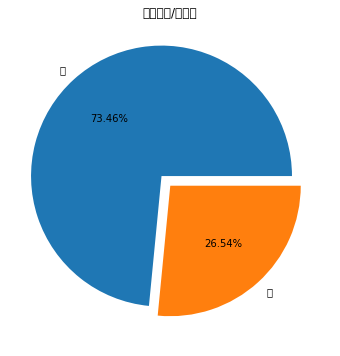

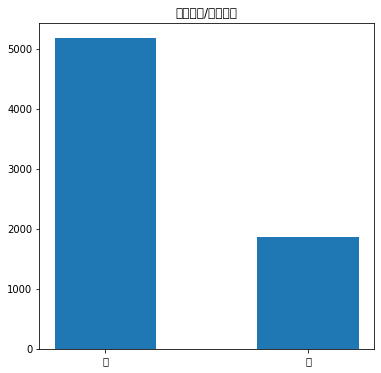

In [61]:
import matplotlib.pyplot as plt

# 设置字体及画图大小
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['figure.figsize'] = 6, 6

# 获取流失列的频数分布
churn_data = df['流失'].value_counts()

# 画客户流失占比饼状图
plt.pie(churn_data, labels=churn_data.index,
        autopct='%1.2f%%', explode=(0.1, 0))
plt.title('流失（是/否）率')
plt.show()

# 画客户流失柱状图数量对比
plt.bar(churn_data.index, churn_data.values, width=0.5)
plt.title('流失（是/否）人数')
plt.show()

> 由上面两张图可看出，流失人数占了总人数仅1/4，达到了近2000人。

## 根据用户基本信息进行分析

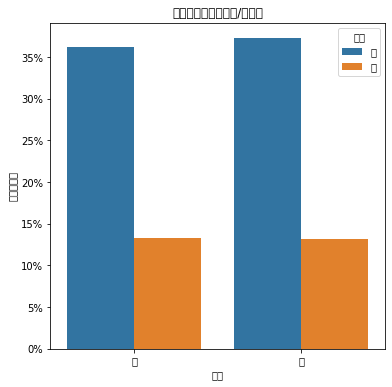

In [64]:
import seaborn as sns

# 画各部分流失与非流失人数占比的条形图
def barplot_percentages(feature, orient='v', axis_name="客户百分比"):
    # 计算字段中，各部分流失与非流失人数的占比
    churn_rate = (df.groupby(feature)["流失"].value_counts()/len(df)).to_frame()
    churn_rate.rename(columns={"流失": axis_name}, inplace=True)
    churn_rate.reset_index(inplace=True)

    # 如果是垂直方向的话，则画柱状图
    if orient == 'v':
        ax = sns.barplot(x=feature, y=axis_name,
                         hue='流失', data=churn_rate, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    
    # 如果不是垂直方向，则画横向条形图
    else:
        ax = sns.barplot(x=axis_name, y=feature,
                         hue='流失', data=churn_rate, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
        plt.legend(fontsize=10)
        
    plt.title('关于{0}的流失（是/否）率'.format(feature))
    plt.show()


barplot_percentages("性别")

> 上图为不同性别的情况下客户客户流失率情况，可以看出男女流失情况几乎一模一样，因此可以认为用户流失与性别基本无关。

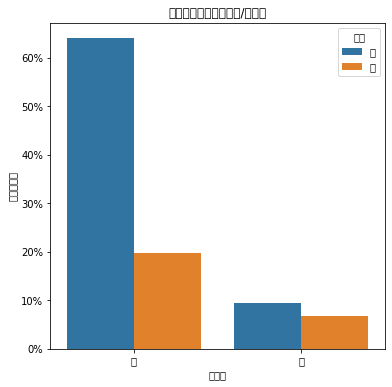

In [63]:
barplot_percentages("老年人")

> 上图为不同年龄的情况下客户客户流失率情况。可以看出，似乎老年人与非老年人在总数据中的流失比例为1:2。但是由于老年人与非老年人的人数差距较大，无法直接看出。因此我们需要分别计算老年人和非老年人的流失人数占各自总人数的比例。

In [67]:
# 计算老年人对应流失的频数分布
elder_data = df.groupby(['老年人'])['流失'].value_counts()

# 计算非老年人中，流失人数占总非老年人的比例
younger_churn_rate = elder_data[0]['是']/elder_data[0].sum()*100
print(f'非老人占总非老人的流失率为：{younger_churn_rate:.2f}%')

# 计算老年人中，流失人数占总老年人的比例
older_churn_rate = elder_data[1]['是']/elder_data[1].sum()*100
print(f'老年人占总老年人的流失率为：{older_churn_rate:.2f}%')

非老人占总非老人的流失率为：23.61%
老年人占总老年人的流失率为：41.68%


> 通过计算老年人与非老年人在各自数据中的流失率，可发现老人年在总老年人数据中，流失率高达41.68%,接近非老年人的2倍。猜测老年人由于对电信服务需求不高或者不熟悉电子设备的操作等原因，因此更加容易流失。

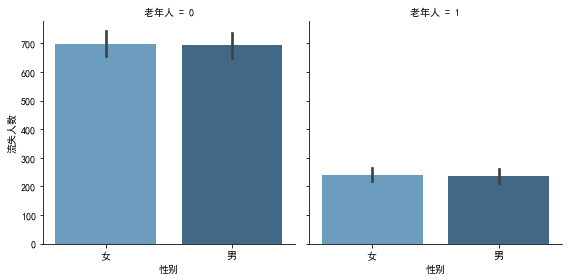

In [13]:
# 在原始数据集中新增一列，将流失的是否替换是0,1
df['流失人数'] = df['流失'].replace({"否": 0, "是": 1})

# 画老年人对应性别流失情况的柱状图
g = sns.FacetGrid(df, col="老年人", height=4)
ax = g.map(sns.barplot, "性别", "流失人数",palette="Blues_d", order=['女', '男'], estimator=sum)
plt.show()

> 上图为不同性别的老年人和非老年人的流失率，不论是老年人还是非老年人里男性和女性的流失人数都基本持平，说明性别在老年人与非老年人群体中，对流失同样没有影响。
>
> **注意**：上面我们新增了一列**流失人数**并将流失与否替换成了0和1，这是为了用seaborn作图时方便计算人数。我们直接采取sum求和的方式，把一定条件下所有的1求和，即为流失人数。

> 由于年龄、性别这些特征是用户的自身属性，因此我们接下来主要研究外部因素（即有无伙伴或亲属）对用户流失的影响。

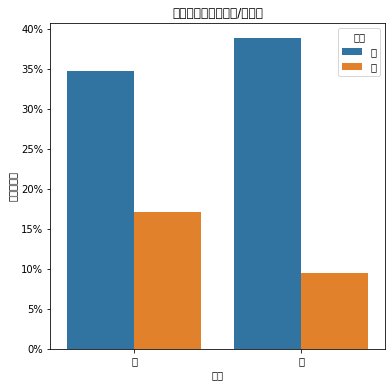

In [66]:
barplot_percentages('伙伴')

> 上图表示有无伙伴的客户人数分布及对应的流失率。由图可知，有伙伴的用户流失占比低于无伙伴的用户。

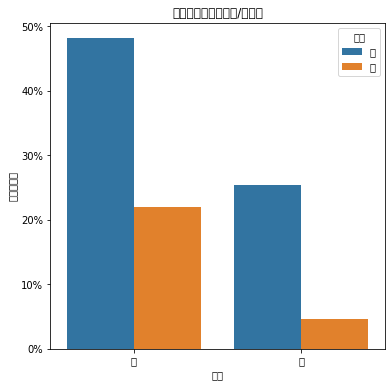

In [65]:
barplot_percentages('家属')

> 上图表示有无家属的客户人数分布及对应的流失率。由图可知，有家属的用户相对较少，且有家属的用户流失占比低于无家属的用户。

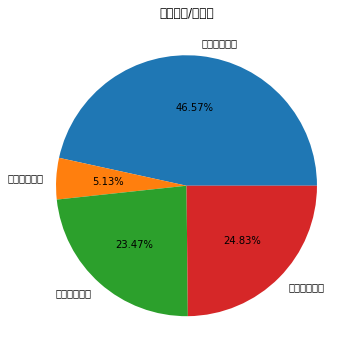

In [68]:
# 对伙伴、家属进行分组，再对结果中的顾客ID进行聚合
user_number = df.groupby(['伙伴','家属'])['顾客ID'].count()/len(df)

# 画关于伙伴、家属的客户人数占比的饼图
plt.pie(user_number,autopct='%1.2f%%',labels=['无伙伴无家属','无伙伴有家属','有伙伴无家属','有伙伴有家属'],)
plt.title('流失（是/否）率')
plt.show()

> 由上图可知，无伙伴且无家属的客户接近总人数的一半。

> 这是一个值得注意的信号：虽然无伙伴且无家属的客户，其通话需求比较少，但由于这部分客户人数占比近50%，若能挖缺其潜在需求（如网络需求），并降低他们的流失率，则可有效降低运营商的成本。

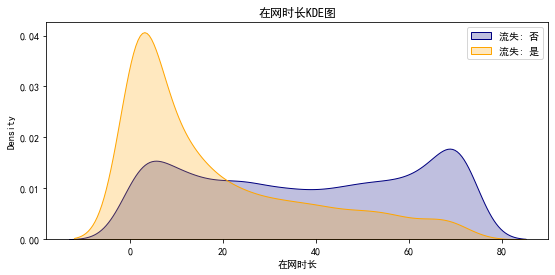

In [17]:
# 定义绘制核密度估计图函数
def kdeplot(feature, xlabel):
    # 创建画布
    plt.figure(figsize=(9, 4))
    
    # 绘制流失与非流失的核密度估计图
    ax0 = sns.kdeplot(df[df['流失'] == '否'][feature].dropna(),
                      color='navy', label='流失: 否', shade='True')
    ax1 = sns.kdeplot(df[df['流失'] == '是'][feature].dropna(
    ), color='orange', label='流失: 是', shade='True')
    
    
    plt.title("{0}KDE图".format(feature))
    plt.xlabel(xlabel)
    plt.rcParams.update({'font.size': 20})
    plt.legend(fontsize=10)

# 绘制在网时长的核密度估计图
kdeplot('在网时长', '在网时长')
plt.show()

> 上图表示不同在网时长对应流失与非流失人数分布情况。由上图可知，在网时长越久，流失率越低。

### 小结

1. **是否为老年人、有无伙伴、有无亲属、在网时长**这四个方面均对客户的流失率有影响，性别不影响客户的流失率。
2. 非老年人相较于老年人，无伙伴相较于有伙伴、无亲属相较于有亲属的客户流失率更高；另外，在网时长越长，客户越不容易流失。

## 根据用户开通的服务信息进行分析

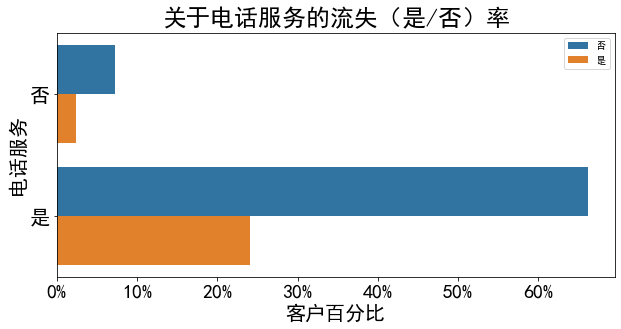

In [18]:
# 绘制电话服务流失情况条形图
plt.figure(figsize=(10, 4.5))
barplot_percentages("电话服务", orient='h')

In [19]:
# 获取电话服务数据的频数分布
phone_serive = df['电话服务'].value_counts()

# 计算开通电话服务流失人数占开通电话服务总人数的比例
phone_rate = len(df[(df['电话服务'] == '是') & (df['流失'] == '是')])/phone_serive['是']
print(f'开通电话服务流失人数占有电话服务总人数的{phone_rate*100:.2f}%')

# 计算未开通服务流失人数占未开通电话服务总人数的比例
no_phone_rate = len(df[(df['电话服务'] == '否') & (df['流失'] == '是')])/phone_serive['否']
print(f'未开通电话服务流失人数占未开通电话服务总人数的{no_phone_rate*100:.2f}%')

开通电话服务流失人数占有电话服务总人数的26.71%
未开通电话服务流失人数占未开通电话服务总人数的24.93%


> 由上面电话服务流失条形图可以看出，开通电话服务的流失率显著高于未开通的流失率；

> 但是我们观察发现开通电话服务中，流失人数占总开通电话服务人数的比例，和未开通服务中，流失人数占总未开通电话服务人数比例相差不大，因此推断电话服务对流失率影响不大。

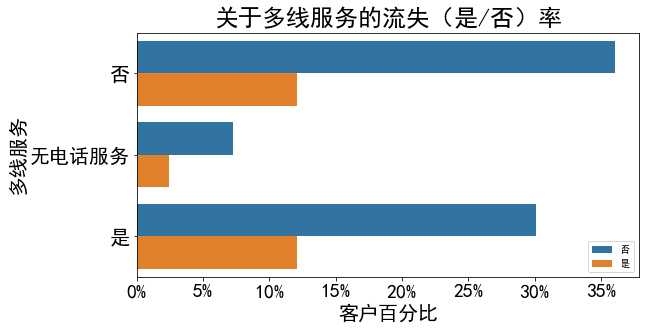

In [20]:
# 绘制多线服务流失情况条形图
plt.figure(figsize=(9, 4.5))
barplot_percentages("多线服务", orient='h')

> 上图为开通多线服务与否的客户流失人数占比，可以看出是否开通对流失基本没有影响。

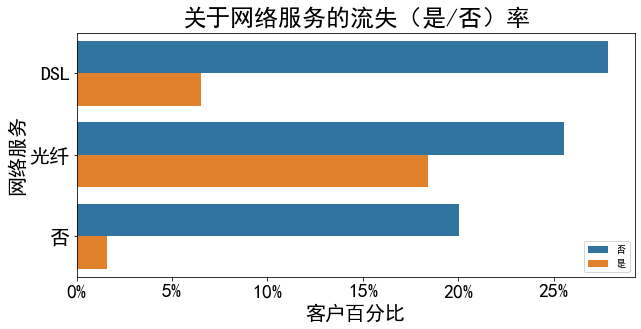

In [21]:
# 绘制网络服务流失情况条形图
plt.figure(figsize=(10, 4.5))
barplot_percentages("网络服务", orient='h')

> 在网络服务中，选择光纤类型的客户流失率接近20%，远高于选择其他两种增值业务的流失率。

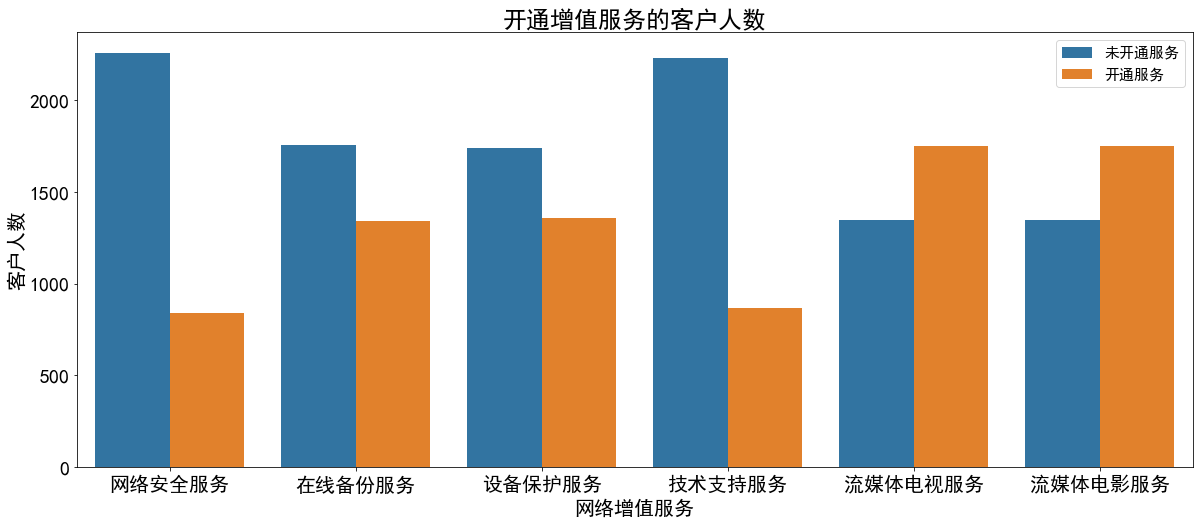

In [23]:
# 取出网络服务为光纤的其他相关服务的数据，并把宽数据转成长数据
cols = ["网络安全服务", "在线备份服务",
        "设备保护服务", "技术支持服务", "流媒体电视服务", "流媒体电影服务"]
df1 = pd.melt(df[df["网络服务"] == "光纤"][cols])
df1.rename(columns={'value': '开通服务'}, inplace=True)

# 绘制网络增值服务的柱状图
plt.figure(figsize=(20, 8))
ax = sns.countplot(data=df1, x='variable', hue='开通服务')

ax.set(xlabel='网络增值服务', ylabel='客户人数')
plt.rcParams.update({'font.size': 20})
plt.legend(labels=['未开通服务', '开通服务'], fontsize=15)
plt.title('开通增值服务的客户人数')
plt.show()

> 由前面的分析结果可以知道光纤用户的流失率显著高于其他两种，因此上图针对光纤用户进行其他增值服务的分析。由图可以看出开通两种流媒体服务的人数较多。

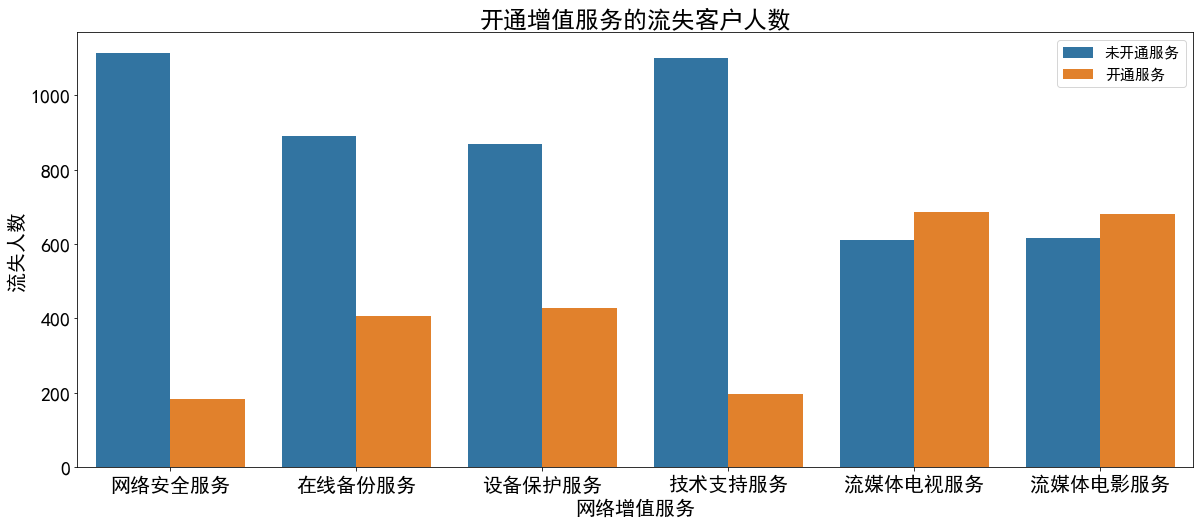

In [24]:
# 取出网络服务为光纤的其他相关服务的流失数据，并把宽数据转成长数据
plt.figure(figsize=(20, 8))
df2 = df[(df['网络服务'] == "光纤") & (df['流失'] == "是")]
df2 = pd.melt(df2[cols])
df2.rename(columns={'value': '开通服务'}, inplace=True)

# 绘制网络增值服务流失情况柱状图
ax = sns.countplot(data=df2, x='variable',
                   hue='开通服务', hue_order=['否', '是'])
ax.set(xlabel='网络增值服务', ylabel='流失人数')
plt.rcParams.update({'font.size': 20})
plt.legend(labels=['未开通服务', '开通服务'], fontsize=15)
plt.title('开通增值服务的流失客户人数')
plt.show()

> 上图表示选择光纤服务的同时是否有选择别的增值服务的客户流失人数对比，可以看出开通网络安全服务、在线备份服务、设备保护服务和技术支持服务的客户流失情况均低于流媒体电视和流媒体电影；
> 开通流媒体电视服务和开通流媒体电影服务流失的人数均高于未开通对应服务的人数。

### 小结

> **电话服务**整体对用户流失影响较小，且**多线服务**对用户流失基本无影响。**光纤用户**的流失占比较高。光纤用户绑定了**网络安全服务**、**在线备份服务**、**设备保护服务**、**技术支持服务**之类增值服务的流失率低于绑定**流媒体电视服务**、**流媒体电影服务**的流失率。

## 根据用户的付费信息进行分析

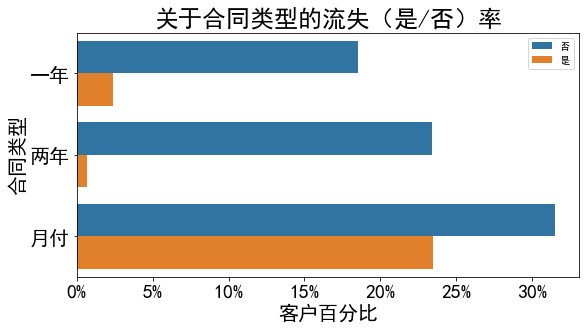

In [25]:
# 绘制合同类型流失情况条形图
plt.figure(figsize=(9, 4.5))
barplot_percentages("合同类型", orient='h')

> 由上图我们可以发现，月付的用户流失率远高于其他两种合同类型。

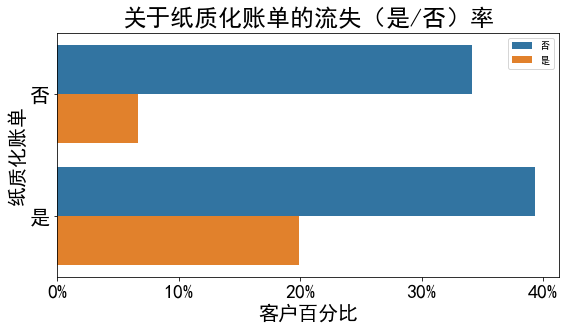

In [27]:
# 绘制纸质化账单流失情况直方图
plt.figure(figsize=(9, 4.5))
barplot_percentages("纸质化账单", orient='h')

> 纸质化账单流失率是非纸质化账单流失率的两倍以上。

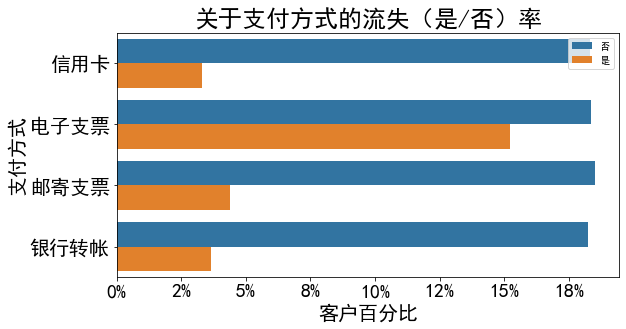

In [28]:
# 绘制支付方式流失情况直方图
plt.figure(figsize=(9, 4.5))
barplot_percentages("支付方式", orient='h')

> 上图表示不同的付款方式下客户的流失率对比，可以看出以电子支票方式支付的用户流失率非常高，远超于其他支付类型。

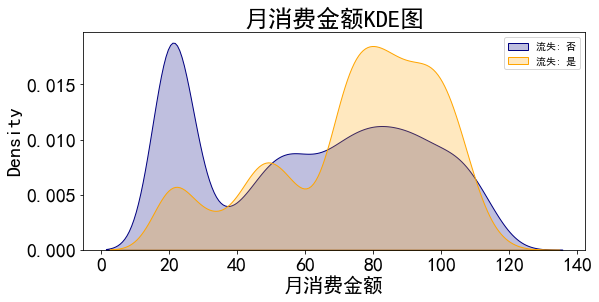

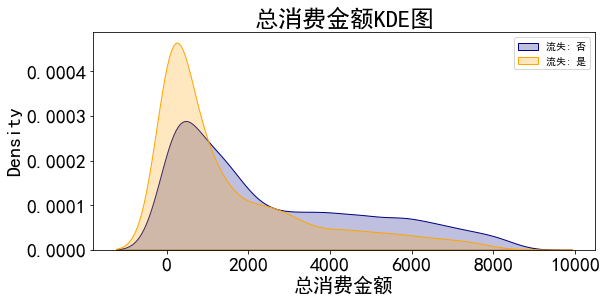

In [29]:
# 绘制月消费金额以及总消费金额的核密度估计图
kdeplot('月消费金额', '月消费金额')
kdeplot('总消费金额', '总消费金额')
plt.show()

> 上图表示流失率与月消费额和总消费额的关系及趋势变化。由上图可以看出：**月消费额**大约在70-110之间用户流失率较高；另外，随着总消费金额的增加，流失的人数越来越少。

### 小结

> **签订合同方式**对客户流失率影响为：按月签订 > 按一年签订 > 按两年签订，证明长期合同最能保留客户。

> 采用**电子支票**支付以及采用纸质化账单的流失率较高，推测这两种方式的使用体验均为一般。

> **月消费额**大约在70-110之间用户流失率较高。长期来看，用户总消费越高，流失率越低，符合一般经验。

# 五、用户流失预测

> 对数据集进一步清洗和提取特征，通过特征选取对数据进行降维，采用机器学习模型应用于测试数据集，然后对构建的分类模型准确性进行分析。

## 数据清洗

> 观察数据类型，发现大多除了**在网时长**、**月消费金额**、**总消费金额**是连续特征，其它都是离散特征。对于连续特征，采用标准化方式处理。对于离散特征，特征之间没有大小关系，采用**one-hot编码**；特征之间有大小关联，则采用数值映射。

In [30]:
# 获取顾客id以及去掉数据集中的顾客id，方便后续操作
customerID = df['顾客ID']
df.drop(['顾客ID'], axis=1, inplace=True)

In [31]:
# 获取离散变量
cateCols = [c for c in df.columns if df[c].dtype == 'object' or c == '老年人']
dfCate = df[cateCols].copy()
dfCate.head(3)

,性别,老年人,伙伴,家属,电话服务,多线服务,网络服务,网络安全服务,在线备份服务,设备保护服务,技术支持服务,流媒体电视服务,流媒体电影服务,合同类型,纸质化账单,支付方式,流失
0,女,0,有,无,否,无电话服务,DSL,否,是,否,否,否,否,月付,是,电子支票,否
1,男,0,无,无,是,否,DSL,是,否,是,否,否,否,一年,否,邮寄支票,否
2,男,0,无,无,是,否,DSL,是,是,否,否,否,否,月付,是,邮寄支票,是


In [32]:
# 进行特征编码
for col in cateCols:
    if dfCate[col].nunique() == 2:
        dfCate[col] = pd.factorize(dfCate[col])[0]
    else:
        dfCate = pd.get_dummies(dfCate, columns=[col])
        
dfCate['在网时长'] = df[['在网时长']]
dfCate['月消费金额'] = df[['月消费金额']]
dfCate['总消费金额'] = df[['总消费金额']]

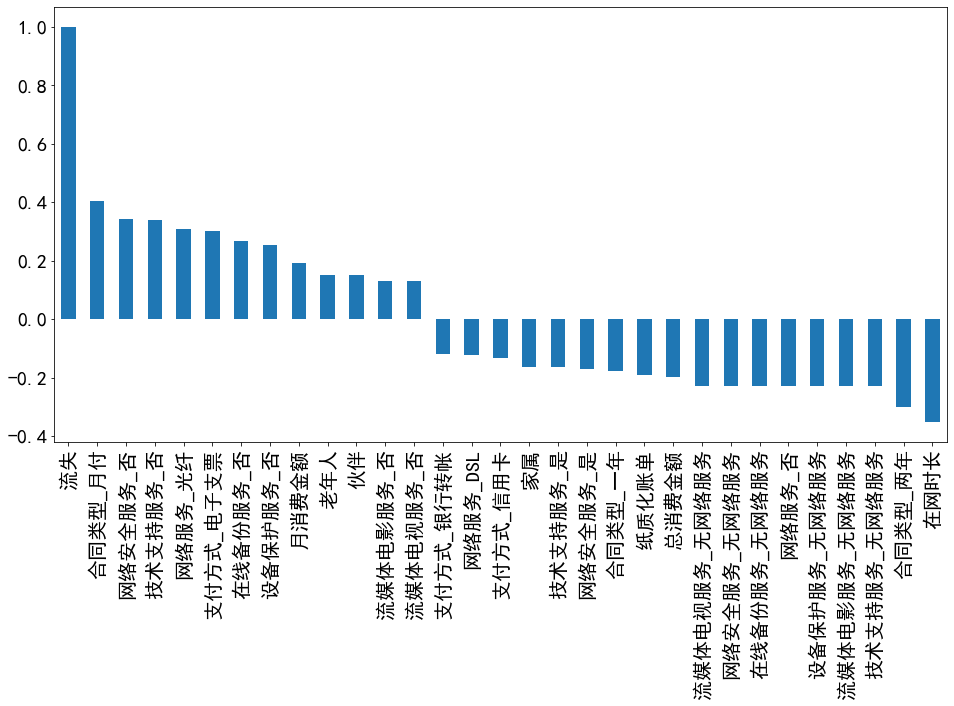

In [58]:
import matplotlib

# 让图形正常显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 查看相关系数的条形图
plt.figure(figsize=(16, 8))
corr_data = dfCate.corr()['流失'].sort_values(ascending=False)
corr_data.plot(kind='bar')
plt.show()

## 特征选取

> 根据经验以及上面的图形，我们删除相关系数的绝对值小于0.1的特征，使预测结果更加准确

In [34]:
# 筛选特征
dropFea = corr_data[abs(corr_data) < 0.1].index
dfCate.drop(columns=dropFea, inplace=True)

# 最后一列是作为标识
target = dfCate['流失'].values

# 列表：特征和1个标识
columns = dfCate.columns.tolist()

In [35]:
# 构造训练数据集和测试数据集。
from sklearn.model_selection import train_test_split

columns.remove('流失')

# 含有特征的DataFrame
features = dfCate[columns].values

# 30% 作为测试集，其余作为训练集
# random_state = 1表示重复试验随机得到的数据集始终不变
# stratify = target 表示按标识的类别，作为训练数据集、测试数据集内部的分配比例
train_x, test_x, train_y, test_y = train_test_split(
    features, target, test_size=0.30, stratify=target, random_state=1)

## 构建模型

In [36]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# 构造各种分类器
classifiers = [
    SVC(random_state=1, kernel='rbf'),
    DecisionTreeClassifier(random_state=1, criterion='gini'),
    RandomForestClassifier(random_state=1, criterion='gini'),
    KNeighborsClassifier(metric='minkowski'),
    AdaBoostClassifier(random_state=1),
]
# 分类器名称
classifier_names = [
    'svc',
    'decisiontreeclassifier',
    'randomforestclassifier',
    'kneighborsclassifier',
    'adaboostclassifier',
]
# 分类器参数
# 注意分类器的参数，字典键的格式，GridSearchCV对调优的参数格式是"分类器名"+"__"+"参数名"
classifier_param_grid = [
    {'svc__C': [0.1], 'svc__gamma':[0.01]},
    {'decisiontreeclassifier__max_depth': [6, 9, 11]},
    {'randomforestclassifier__n_estimators': range(1, 11)},
    {'kneighborsclassifier__n_neighbors': [4, 6, 8]},
    {'adaboostclassifier__n_estimators': [70, 80, 90]}
]

## 模型参数评估和调优

In [37]:
# 对具体的分类器进行 GridSearchCV 参数调优
def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, param_grid, score='accuracy_score'):
    response = {}
    gridsearch = GridSearchCV(
        estimator=pipeline, param_grid=param_grid, cv=3, scoring=score)
    
    # 寻找最优的参数 和最优的准确率分数
    search = gridsearch.fit(train_x, train_y)
    print("GridSearch 最优参数：", search.best_params_)
    print("GridSearch 最优分数： %0.4lf" % search.best_score_)
    
    # 采用predict函数（特征是测试数据集）来预测标识，预测使用的参数是上一步得到的最优参数
    predict_y = gridsearch.predict(test_x)
    print(" 准确率 %0.4lf" % accuracy_score(test_y, predict_y))
    
    response['predict_y'] = predict_y
    response['accuracy_score'] = accuracy_score(test_y, predict_y)
    
    return response


for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    # 采用 StandardScaler 方法对数据规范化：均值为0，方差为1的正态分布
    pipeline = Pipeline([
        #('scaler', StandardScaler()),
        # ('pca',PCA),
        (model_name, model)
    ])
    
    result = GridSearchCV_work(
        pipeline, train_x, train_y, test_x, test_y, model_param_grid, score='accuracy')

GridSearch 最优参数： {'svc__C': 0.1, 'svc__gamma': 0.01}
GridSearch 最优分数： 0.7560
 准确率 0.7591
GridSearch 最优参数： {'decisiontreeclassifier__max_depth': 6}
GridSearch 最优分数： 0.7795
 准确率 0.7903
GridSearch 最优参数： {'randomforestclassifier__n_estimators': 6}
GridSearch 最优分数： 0.7700
 准确率 0.7690
GridSearch 最优参数： {'kneighborsclassifier__n_neighbors': 8}
GridSearch 最优分数： 0.7684
 准确率 0.7880
GridSearch 最优参数： {'adaboostclassifier__n_estimators': 70}
GridSearch 最优分数： 0.7978
 准确率 0.8017


## 实施和方案

> 由于没有预测数据集，选择最后10条为例进行预测

In [38]:
# 使用上述得到的最优模型
model = AdaBoostClassifier(n_estimators=70)
model.fit(train_x, train_y)

# 提取customerID
pred_id = customerID.tail(10)

# 提取预测数据集特征（如果有预测数据集，可以一并进行数据清洗和特征提取）
pred_x = dfCate.drop(['流失'], axis=1).tail(10)

# 预测值
pred_y = model.predict(pred_x)

# 预测结果及对比
predDf = pd.DataFrame({'顾客ID': pred_id, '流失预测': pred_y, 
                       '流失': df.tail(10)['流失'].map({'否':0, '是':1})})
print(predDf)

            顾客ID  流失预测  流失
7033  9767-FFLEM     0   0
7034  0639-TSIQW     0   1
7035  8456-QDAVC     0   0
7036  7750-EYXWZ     0   0
7037  2569-WGERO     0   0
7038  6840-RESVB     0   0
7039  2234-XADUH     0   0
7040  4801-JZAZL     0   0
7041  8361-LTMKD     1   1
7042  3186-AJIEK     0   0


# 六、结论和建议

> 根据以上分析，得到高流失率用户的特征：
>
>- **用户属性**：老年用户、无伙伴用户、无亲属用户以及在网时长越短的用户更加容易流失；
>- **服务属性**：光纤用户/光纤用户绑定流媒体电视服务、流媒体电影服务的用户更加容易流失；
>- **合同属性**：签订月付合同、采用电子支票支付、有纸质化账单和月租费约70至110元的客户容易流失；
>- 其它属性对用户流失影响较小，以上特征保持独立。


> 针对上述结论，从业务角度给出相应建议：
> 
>- 根据预测模型，构建一个高流失率的用户列表。通过用户调研推出一个最小可行化产品功能，并邀请种子用户进行试用。
>- **用户方面**：针对老年用户、无亲属、无伙伴用户的特征推出定制服务如老年套餐，关爱套餐等，一方面加强与其它用户关联度，另一方对特定用户提供个性化服务，能够有效提升留存率。针对新注册用户，推送半年优惠如赠送消费券，以渡过用户流失高峰期。
>- **服务方面**：。针对光纤用户和附加流媒体电视、电影服务用户，重点在于提升网络体验、增值服务体验，一方面推动技术部门提升网络指标，另一方面对用户承诺免费网络升级和赠送电视、电影等包月服务以提升用户黏性。针对在线安全、在线备份、设备保护、技术支持等增值服务，应重点对用户进行推广介绍，如首月/半年免费体验。
>- **合同方面**：针对单月合同用户，建议推出年合同付费折扣活动，将月合同用户转化为年合同用户，提高用户在网时长，以达到更高的用户留存。 针对采用电子支票支付用户，建议定向推送其它支付方式的优惠券，引导用户改变支付方式。